In [2]:
#Importing the requisite libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math as m

# PFR model with  HX integration

In [18]:

#Assuming that we have a first order reaction, A > B
#Assuming that there are no pressure drops
#Ideal gases
#No B in the feed
#Reaction rate data
A = 500000 #pre-exponential factor in the Arrhenius expression (1/s)
E = 40000 #Activation energy (J/mol)
R = 8.314 #Ideal gas constant, J/(mol K)
#Thermodynamic data
U = 3000 #Universal heat transfer coefficient, [J.m/(K.s)]
a = 2 #surface area per volume for heat exchange (1/m)
CpA = 350 #Specific heat of A J/(mol.K)
CpB = 550 #Specific heat of B J/(mol.K)
CpC = 50 #Specific heat of coolant J/(kg.K)
H = -500000 #Std. enthalpy of reaction (J/mol) at 298 K
#Inlet & HX conditions
CAo = 0.1 #Inlet concentration of A (M)
vo = 2.5 #Inlet volumetric flowrate (L/s)
To = 343 #Inlet temperature (K)
mc = 50 #coolant mass flow rate (kg/s)

In [19]:
#Define the functions
def pfr(S, V):
    dXdV = (A*m.exp(-E/(R*S[1]))*To*(1-S[0]))/(vo*S[1])
    dTdV = (-(U*a*(S[1]-S[2])) - ((A*m.exp(-E/(R*S[1]))*CAo*To*(1-S[0]))/(S[1]))*(H + (CpB-
    CpA)*(S[1]-298)))/((CAo*vo)*(CpA + (CpB - CpA)*S[0]))
    dTcdV = (U*a*(S[1] - S[2]))/(mc*CpC)
    dSdV = [dXdV, dTdV, dTcdV]
    return dSdV

In [20]:

#Solving the system of ODEs
V = np.linspace(0, 20, 100)
S0 = [0,To,287]
S = odeint(pfr, S0, V)


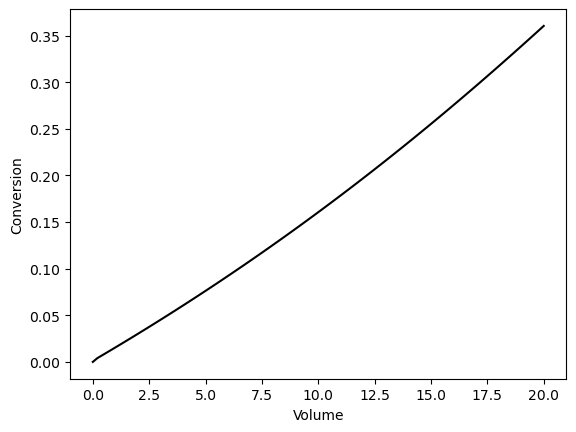

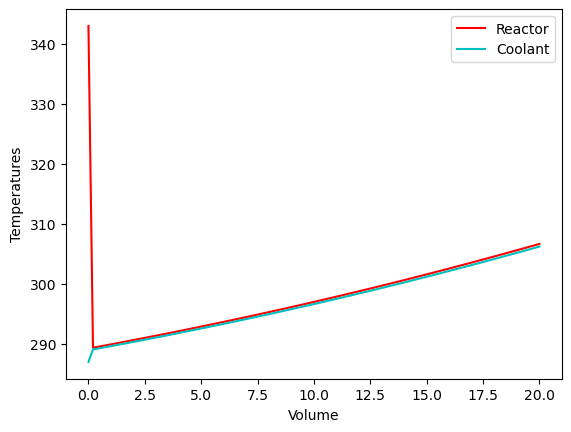

In [21]:
#Preparing the plots
X = S[:,0]
T = S[:,1]
Tc = S[:,2]
plt.plot(V, X, "k")
plt.xlabel("Volume")
plt.ylabel("Conversion")
plt.show()
plt.plot(V, T, "r", label = "Reactor")
plt.plot(V, Tc, "c", label = "Coolant")
plt.xlabel("Volume")
plt.ylabel("Temperatures")
plt.legend()
plt.show()

# Adiabatic PFR model

In [9]:
#Reaction: aA > bB
a = 1 #You can define values for a and b
b = 2
deltadot = b - a
yAo = 1 #Mole fraction of A in inlet stream
eps = (yAo*deltadot)/a #Epsilon
vo = 3 #L/s
#Defining thermodynamic properties
CpA = 85 #J/(mol K)
CpB = 110
dHs = -200000 #delta H at standard conditions, J
Tref = 298 #K
To = 313 #K
#Reaction parameters
A = 400000 #pre-exponential factor
EA = 50000 #Activation energy, J/(mol K)
R = 8.314 #J/(mol K)

In [12]:
def adiabaticpfr(X, V):
    T = (X*dHs - (CpB - CpA)*Tref*X - CpA*To)/(X*(CpB - CpA) - CpA)
    k = A*m.exp(-EA/(R*T))
    dXdt = (k/vo)*((1-X)/(1+eps*X))*(To/T)
    return dXdt



C:\Users\akarnik\AppData\Local\Temp\ipykernel_15872\608093485.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  k = A*m.exp(-EA/(R*T))


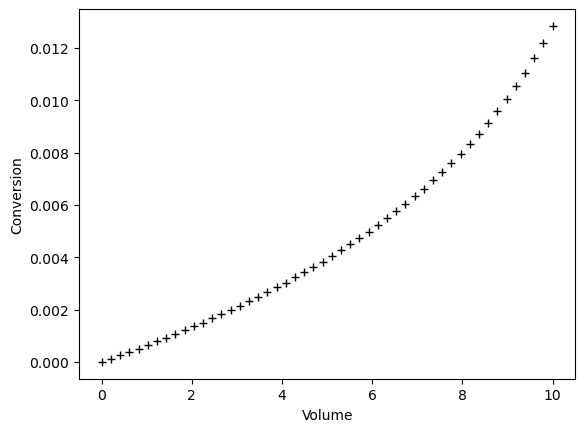

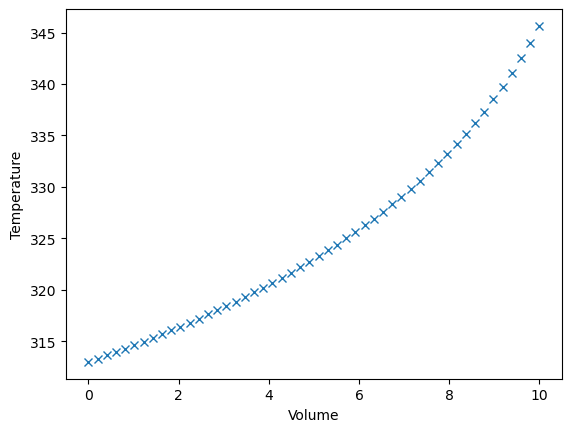

In [13]:
V = np.linspace(0, 10, 50) #L
X0 = 0
X = odeint(adiabaticpfr, X0, V)
T = (X*dHs - (CpB - CpA)*Tref*X - CpA*To)/(X*(CpB - CpA) - CpA)
plt.plot(V, X, "+k")
plt.xlabel("Volume")
plt.ylabel("Conversion")
plt.show()
plt.plot(V, T, "x")
plt.xlabel("Volume")
plt.ylabel("Temperature")
plt.show()